## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.5, 0.05]

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.9941 - acc: 0.2836 - val_loss: 1.8662 - val_acc: 0.3408
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8141 - acc: 0.3575 - val_loss: 1.8864 - val_acc: 0.3383
Epoch 3/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7344 - acc: 0.3875 - val_loss: 1.7390 - val_acc: 0.3771
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6822 - acc: 0.4073 - val_loss: 1.7669 - val_acc: 0.3626
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6424 - acc: 0.4221 - val_loss: 1.6692 - val_acc: 0.4118
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6061 - acc: 0.4323 - val_loss: 1.6014 - val_acc: 0.4266
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5803 - acc: 0.4415 - val_loss: 1.6306 - 

Epoch 2/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.8906 - acc: 0.3320 - val_loss: 1.8696 - val_acc: 0.3292
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8178 - acc: 0.3577 - val_loss: 1.8542 - val_acc: 0.3245
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7671 - acc: 0.3783 - val_loss: 1.7876 - val_acc: 0.3677
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7323 - acc: 0.3904 - val_loss: 1.7052 - val_acc: 0.4034
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6996 - acc: 0.4019 - val_loss: 1.7215 - val_acc: 0.3825
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6708 - acc: 0.4129 - val_loss: 1.7752 - val_acc: 0.3765
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6494 - acc: 0.4210 - val_loss: 1.6726 - val_acc: 0.4050
Epoch 9/50
50000/50000 [==========

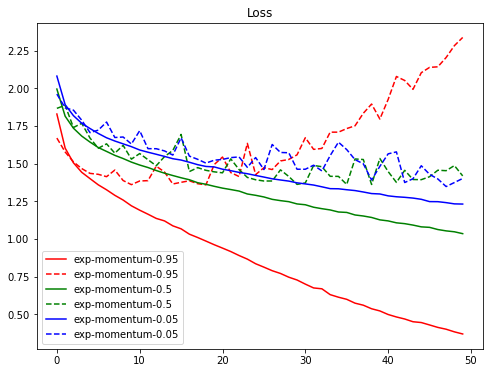

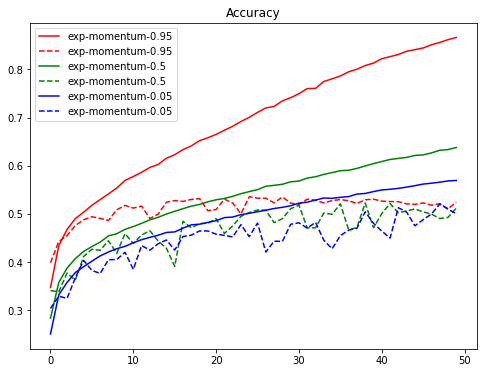

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()